In [1]:
#improt libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

In [2]:
#upload dataset
reviews=pd.read_json("C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/JASON/dataset/review.json",lines=True)
category=pd.read_csv("C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/extracts/category.csv")


C:\Users\25355\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
business=pd.read_csv("C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/extracts/business.csv")

In [4]:
#name columns
category.columns=['business_id','category','id', 'name','neighborhood','address','city','state','zip','latitude','longitude','stars','review count','is open']
business.columns=['business_id', 'name','neighborhood','address','city','state','zip','latitude','longitude','stars','review count','is open']

In [5]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174566 entries, 0 to 174565
Data columns (total 12 columns):
business_id     174566 non-null object
name            174566 non-null object
neighborhood    68015 non-null object
address         168124 non-null object
city            174565 non-null object
state           174565 non-null object
zip             173943 non-null object
latitude        174565 non-null float64
longitude       174565 non-null float64
stars           174566 non-null float64
review count    174566 non-null int64
is open         174566 non-null int64
dtypes: float64(3), int64(2), object(7)
memory usage: 16.0+ MB


In [6]:
business.head()

business_id                               name neighborhood  \
0  --7zmmkVg-IMGaXbuVd0SQ                     Primal Brewery          NaN   
1  --8LPVSo5i0Oo61X01sV9A  Valley Bone and Joint Specialists          NaN   
2  --9e1ONYQuAa-CB_Rrw7Tw               Delmonico Steakhouse    The Strip   
3  --9QQLMTbFzLJ_oT-ON3Xw                        Great Clips          NaN   
4  --ab39IjZR_xUf81WyTyHg                    Famous Footwear          NaN   

                                        address          city state    zip  \
0                      16432 Old Statesville Rd  Huntersville    NC  28078   
1                   3941 E Baseline Rd, Ste 102       Gilbert    AZ  85234   
2                         3355 Las Vegas Blvd S     Las Vegas    NV  89109   
3                  1835 E Guadalupe Rd, Ste 106         Tempe    AZ  85283   
4  1800 E Rio Salado Pky 110, Tempe Marketplace         Tempe    AZ  85281   

   latitude  longitude  stars  review count  is open  
0   35.4371   -80.8437    4.0            47        1  
1   33.3795  -111.7280    4.5             3        1  
2   36.1232  -115.1690    4.0          1451        1  
3   33.3617  -111.9100    3.5            11        1  
4   33.4301  -111.9050    4.0            10        1

In [7]:
category.head()

business_id                                           category  \
0  --6MefnULPED_I942VcFNA                               Chinese, Restaurants   
1  --7zmmkVg-IMGaXbuVd0SQ                                    Food, Breweries   
2  --8LPVSo5i0Oo61X01sV9A  Orthopedists, Weight Loss Centers, Sports Medi...   
3  --9e1ONYQuAa-CB_Rrw7Tw             Cajun/Creole, Steakhouses, Restaurants   
4  --9QQLMTbFzLJ_oT-ON3Xw                         Hair Salons, Beauty & Spas   

                       id                               name neighborhood  \
0  --6MefnULPED_I942VcFNA      John's Chinese BBQ Restaurant          NaN   
1  --7zmmkVg-IMGaXbuVd0SQ                     Primal Brewery          NaN   
2  --8LPVSo5i0Oo61X01sV9A  Valley Bone and Joint Specialists          NaN   
3  --9e1ONYQuAa-CB_Rrw7Tw               Delmonico Steakhouse    The Strip   
4  --9QQLMTbFzLJ_oT-ON3Xw                        Great Clips          NaN   

                                      address           city state      zip  \
0  328 Highway 7 E, Chalmers Gate 11, Unit 10  Richmond Hill    ON  L4B 3P7   
1                    16432 Old Statesville Rd   Huntersville    NC    28078   
2                 3941 E Baseline Rd, Ste 102        Gilbert    AZ    85234   
3                       3355 Las Vegas Blvd S      Las Vegas    NV    89109   
4                1835 E Guadalupe Rd, Ste 106          Tempe    AZ    85283   

  latitude longitude  stars  review count  is open  
0  43.8409  -79.3996    3.0            37        1  
1  35.4371  -80.8437    4.0            47        1  
2  33.3795  -111.728    4.5             3        1  
3  36.1232  -115.169    4.0          1451        1  
4  33.3617   -111.91    3.5            11        1

We don't need business data set because it has the same columns that category data set. Also, we need to delete "id" column from the category data set because it is the same as "business_id" columns

In [8]:
category.drop('id', axis=1, inplace=True)

In [9]:
reviews.head()

business_id  cool       date  funny               review_id  \
0  0W4lkclzZThpx3V65bVgig     0 2016-05-28      0  v0i_UHJMo_hPBq9bxWvW4w   
1  AEx2SYEUJmTxVVB18LlCwA     0 2016-05-28      0  vkVSCC7xljjrAI4UGfnKEQ   
2  VR6GpWIda3SfvPC-lg9H3w     0 2016-05-28      0  n6QzIUObkYshz4dz2QRJTw   
3  CKC0-MOWMqoeWf6s-szl8g     0 2016-05-28      0  MV3CcKScW05u5LVfF6ok0g   
4  ACFtxLv8pGrrxMm6EgjreA     0 2016-05-28      0  IXvOzsEMYtiJI0CARmj77Q   

   stars                                               text  useful  \
0      5  Love the staff, love the meat, love the place....       0   
1      5  Super simple place but amazing nonetheless. It...       0   
2      5  Small unassuming place that changes their menu...       0   
3      5  Lester's is located in a beautiful neighborhoo...       0   
4      4  Love coming here. Yes the place always needs t...       0   

                  user_id  
0  bv2nCi5Qv5vroFiqKGopiw  
1  bv2nCi5Qv5vroFiqKGopiw  
2  bv2nCi5Qv5vroFiqKGopiw  
3  bv2nCi5Qv5vroFiqKGopiw  
4  bv2nCi5Qv5vroFiqKGopiw

In [10]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5261669 entries, 0 to 5261668
Data columns (total 9 columns):
business_id    object
cool           int64
date           datetime64[ns]
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 361.3+ MB


We need to merge business data set with reviews and take only restraunts

We need to change column "stars" in category data frame to "average star" or it duplicates the column "star" in reviews and they have different meaning

In [11]:
category.rename(columns={'stars':'average_star'}, inplace=True)

In [33]:
combined=reviews.merge(category, left_on='business_id', right_on='business_id', how='left')

In [34]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5261669 entries, 0 to 5261668
Data columns (total 21 columns):
business_id     object
cool            int64
date            datetime64[ns]
funny           int64
review_id       object
stars           int64
text            object
useful          int64
user_id         object
category        object
name            object
neighborhood    object
address         object
city            object
state           object
zip             object
latitude        object
longitude       object
average_star    float64
review count    float64
is open         float64
dtypes: datetime64[ns](1), float64(3), int64(4), object(13)
memory usage: 883.2+ MB


Let's check which categories to have if we want to have only restraunts

In [35]:
biz_cat=category['category'].unique()
#np.set_printoptions(threshold=200)
biz_cat[200:400]

array(['Refinishing Services, Home Services, Painters',
       'Shades & Blinds, Home Services', 'Cinema, Arts & Entertainment',
       'Home Services, Real Estate Services, Real Estate Agents, Real Estate, Property Management',
       'Pet Training, Pets, Pet Groomers, Pet Services, Pet Sitting',
       "Shopping, Formal Wear, Fashion, Accessories, Men's Clothing",
       'Seafood, Bars, Nightlife, American (New), Restaurants',
       'Web Design, Professional Services, Marketing',
       'Nightlife, Restaurants, American (Traditional), Bars',
       'Pool Cleaners, Active Life, Landscaping, Contractors, Pool & Hot Tub Service, Home Services, Swimming Pools, Professional Services',
       'Dry Cleaning & Laundry, Laundry Services, Local Services',
       'Food, Wineries, Arts & Entertainment, Local Flavor',
       'Sports Clubs, Active Life',
       'Restaurants, American (Traditional), Southern, Breakfast & Brunch',
       'Automotive, Auto Repair, Auto Parts & Supplies',
       'Bar

In [36]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174067 entries, 0 to 174066
Data columns (total 13 columns):
business_id     174067 non-null object
category        174067 non-null object
name            174067 non-null object
neighborhood    67855 non-null object
address         167653 non-null object
city            174066 non-null object
state           174066 non-null object
zip             173446 non-null object
latitude        174067 non-null object
longitude       174067 non-null object
average_star    174067 non-null float64
review count    174067 non-null int64
is open         174067 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 17.3+ MB


We need categories with words "restaurants", "Breweries", "Bars", "Bagels", "Donuts". This way we leave only categories of interest.

In [37]:
combined["category"]=combined["category"].str.lower()
combined_food=combined[combined["category"].str.contains("restaurants|breweries|bars|bagels|donuts",na=False)]

In [38]:
biz_cat=combined_food['category'].unique()
biz_cat[1:200]

array(['diners, food, restaurants, delis',
       'restaurants, canadian (new), italian',
       'specialty food, food, sandwiches, restaurants, burgers, delis',
       'fast food, restaurants, burgers',
       'bakeries, restaurants, food, sandwiches, cafes, coffee & tea',
       'pubs, bars, bar crawl, tours, nightlife, hotels & travel',
       'thai, restaurants, vietnamese',
       'restaurants, fast food, poutineries',
       'dim sum, restaurants, nightlife, chinese, bars',
       'restaurants, breakfast & brunch, diners',
       'tapas bars, japanese, nightlife, tapas/small plates, restaurants, pubs, bars',
       'imported food, food, specialty food, vietnamese, ethnic food, restaurants',
       'restaurants, american (traditional), breakfast & brunch',
       'restaurants, burgers',
       'american (new), ramen, asian fusion, restaurants, chinese, soup, japanese, korean',
       'bars, sports bars, pubs, restaurants, american (traditional), nightlife, beer, wine & spirits, fo

In [18]:
len(biz_cat)

27829

## Visualization

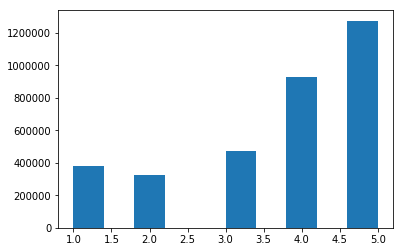

In [33]:
#distribution of ratings
plt.hist(combined_food["stars"])
plt.show()

In [34]:
#count number of users per rating
combined_food.groupby(['stars'])["user_id"].count()

stars
1     381005
2     323225
3     472904
4     926315
5    1274157
Name: user_id, dtype: int64

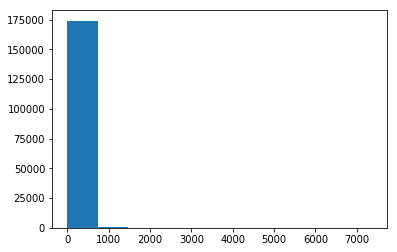

In [35]:
#distribution of businesses
plt.hist(reviews.groupby(['business_id'])["business_id"].count())
plt.show()

In [36]:
some=combined_food.groupby(['business_id'])["business_id"].count()
some.head()

business_id
--6MefnULPED_I942VcFNA      37
--7zmmkVg-IMGaXbuVd0SQ      47
--9e1ONYQuAa-CB_Rrw7Tw    1451
--DaPTJW3-tB1vP-PfdTEg      39
--FBCX-N37CMYDfs790Bnw     108
Name: business_id, dtype: int64

## Clean data before breaking

In [19]:
#checking values for stars data
combined_food['stars'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [20]:
combined_food['stars'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [26]:
combined_food.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id', 'category', 'name', 'neighborhood', 'address',
       'city', 'state', 'zip', 'latitude', 'longitude', 'average_star',
       'review count', 'is open'],
      dtype='object')

#### delete all " and , from text of review

In [51]:
final = combined_food.copy()

In [52]:
final['text']=final['text'].str.replace(',','')

In [54]:
final['text']=final['text'].str.replace('"','')

In [60]:
final['text'][25]

'While looking at different restaurants in the area came upon this restaurant posting and decided to try it as it is down the street from work.\n\nNot bad when you want something slightly cheaper than Congee Star. It is a mix of chinese and choy suey menu.'

In [28]:
combined_food['text']=combined_food['text'].replace(regex=True,inplace=True,to_replace=',',value='')

C:\Users\25355\Anaconda3\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\25355\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Break into train, CV, test

Train, cv, test ratio - 50%, 20%, 30%

In [61]:
train_CV, test = train_test_split(final, test_size=0.3, random_state=92678)

In [62]:
train, cv = train_test_split(train_CV, test_size=0.286, random_state=92678)

In [63]:
wholeData=len(combined_food["stars"])
trainData=len(train["stars"])
cvData=len(cv["stars"])
testData=len(test["stars"])
print("% of train data", trainData/(wholeData/100))
print("% of cv data", cvData/(wholeData/100))
print("% of test data", testData/(wholeData/100))

% of train data 49.97998582427909
% of cv data 20.02000825436715
% of test data 30.000005921353765


In [66]:
train['stars'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [40]:
len(combined_food["business_id"])

3377606

Write the files to work with

In [64]:
final.to_csv('C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/To_Work_with/restaurantData.csv',sep=',')

In [65]:
test.to_csv('C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/To_Work_with/test.csv',sep=',')
cv.to_csv('C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/To_Work_with/cv.csv',sep=',')
train.to_csv('C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/To_Work_with/train.csv',sep=',')
train_CV.to_csv('C:/Users/25355/OneDrive/Study/SMU/Capstone/Data/To_Work_with/trainCV.csv',sep=',')